In [ ]:
import Pkg
Pkg.activate("D:\\Users\\gabri\\Documents\\Data Science & Machine Learning Spring 2025\\Lundquist-CMOR438-Spring2025\\juMLia")
import MLDatasets: Iris
using Plots, DataFrames, Random, LinearAlgebra

  Activating project at `D:\Users\gabri\Documents\Data Science & Machine Learning Spring 2025\Lundquist-CMOR438-Spring2025\juMLia`


In [48]:
using Random

In [100]:
using LinearAlgebra

In [ ]:
import StatsBase

In [21]:
irisdata = Iris()

dataset Iris:
  metadata   =>    Dict{String, Any} with 4 entries
  features   =>    150×4 DataFrame
  targets    =>    150×1 DataFrame
  dataframe  =>    150×5 DataFrame

In [22]:
irisdata.metadata

Dict{String, Any} with 4 entries:
  "feature_names"  => ["sepallength", "sepalwidth", "petallength", "petalwidth"]
  "n_observations" => 150
  "target_names"   => ["class"]
  "path"           => "C:\\Users\\gabri\\.julia\\scratchspaces\\124859b0-ceae-5…

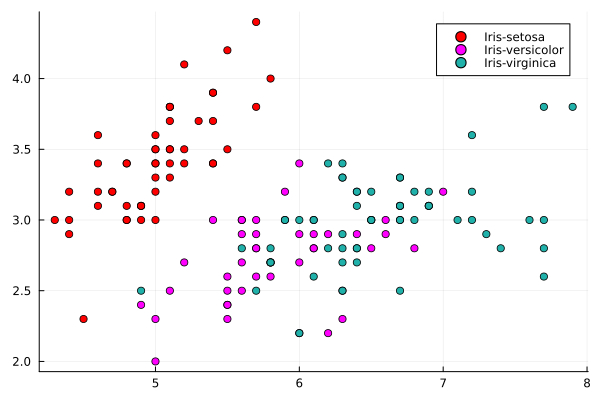

In [46]:
# Plot the data
flowers = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
colors = ["red", "magenta", "lightseagreen"]

plot()
for (species, color) in zip(flowers, colors)
    speciesdata = irisdata.dataframe[irisdata.dataframe.class .== species, :]
    scatter!(speciesdata.sepallength, 
                speciesdata.sepalwidth, 
                markercolor=color, 
                label=species, 
                display=true)
end

plot!()

In [81]:
size([1,2],1)

2

In [95]:
petalfeatures = Vector.(eachrow(irisdata.features[:, [:petallength, :petalwidth]]))
petallabels = irisdata.targets.class

150-element PooledArrays.PooledVector{InlineStrings.String15, UInt32, Vector{UInt32}}:
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 "Iris-setosa"
 ⋮
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"
 "Iris-virginica"

In [96]:
# Assumes inputs and targets are of the same length
function traintestsplit(features, labels, testfraction)
    testlength = ceil(Int, size(features, 1) * testfraction)
    shuffledindices = randperm(size(features, 1))
    return (features[shuffledindices[testlength+1:end]], 
            features[shuffledindices[1:testlength]], 
            labels[shuffledindices[testlength+1:end]],
            labels[shuffledindices[1:testlength]])
end

traintestsplit (generic function with 2 methods)

In [97]:
(trainfeatures, testfeatures, trainlabels, testlabels) = traintestsplit(petalfeatures, petallabels, 0.33)

([[1.3, 0.2], [5.1, 1.5], [5.0, 1.7], [6.6, 2.1], [4.2, 1.5], [5.5, 1.8], [4.5, 1.5], [5.1, 1.6], [1.4, 0.3], [4.9, 1.5]  …  [5.6, 2.4], [4.5, 1.3], [1.4, 0.3], [4.8, 1.4], [4.5, 1.7], [4.6, 1.5], [6.9, 2.3], [3.5, 1.0], [4.0, 1.3], [1.5, 0.1]], [[4.2, 1.3], [4.7, 1.5], [1.5, 0.2], [1.9, 0.4], [4.0, 1.2], [1.5, 0.1], [4.9, 1.8], [6.0, 2.5], [4.2, 1.2], [3.9, 1.1]  …  [5.1, 2.3], [1.6, 0.2], [1.4, 0.2], [4.0, 1.0], [1.5, 0.4], [5.1, 1.9], [5.9, 2.3], [3.6, 1.3], [5.4, 2.1], [3.5, 1.0]], InlineStrings.String15["Iris-setosa", "Iris-virginica", "Iris-versicolor", "Iris-virginica", "Iris-versicolor", "Iris-virginica", "Iris-versicolor", "Iris-versicolor", "Iris-setosa", "Iris-versicolor"  …  "Iris-virginica", "Iris-versicolor", "Iris-setosa", "Iris-versicolor", "Iris-virginica", "Iris-versicolor", "Iris-virginica", "Iris-versicolor", "Iris-versicolor", "Iris-setosa"], InlineStrings.String15["Iris-versicolor", "Iris-versicolor", "Iris-setosa", "Iris-setosa", "Iris-versicolor", "Iris-setosa",

In [103]:
function knearestneighbors(point, features, labels, numgroups; distance = (x,y) -> norm(x-y))
    neighbordata = Vector{Vector{Any}}(undef, length(features))

    for (featureindex, (feature, label)) in enumerate(zip(features, labels))
        s = distance(point, feature)
        neighbordata[featureindex] = [feature, label, s]
    end

    sort!(neighbordata, by = data -> data[3])

    return neighbordata[begin:numgroups]
end

knearestneighbors (generic function with 1 method)

In [105]:
testfeatures[end]

2-element Vector{Float64}:
 3.5
 1.0

In [104]:
knearestneighbors(testfeatures[end], trainfeatures, trainlabels, 5)

5-element Vector{Vector{Any}}:
 [[3.5, 1.0], InlineStrings.String15("Iris-versicolor"), 0.0]
 [[3.7, 1.0], InlineStrings.String15("Iris-versicolor"), 0.20000000000000018]
 [[3.3, 1.0], InlineStrings.String15("Iris-versicolor"), 0.20000000000000018]
 [[3.3, 1.0], InlineStrings.String15("Iris-versicolor"), 0.20000000000000018]
 [[3.8, 1.1], InlineStrings.String15("Iris-versicolor"), 0.31622776601683783]

In [106]:
testlabels[end]

"Iris-versicolor"

In [113]:
function maxoccurrences(arr)
    arruniqueels = unique(arr)
    arrcount = [count(el -> el == uniqueel, arr) for uniqueel in arruniqueels]
    return arruniqueels[argmax(arrcount)]
end

maxoccurrences (generic function with 1 method)

In [114]:
maxoccurrences(testlabels)

"Iris-versicolor"

In [118]:
function knnclassify(point, features, labels, numgroups)
    neighbors = knearestneighbors(point, features, labels, numgroups)

    neighborlabels = [neighbordata[2] for neighbordata in neighbors]
    return maxoccurrences(neighborlabels)
end

function knnregression(point, features, labels, numgroups)
    neighbors = knearestneighbors(point, features, labels, numgroups)

    return sum([neighbordata[2] for neighbordata in neighbors]) / numgroups
end

knnregression (generic function with 1 method)

In [125]:
knnclassify(testfeatures[21], trainfeatures, trainlabels, 3)

"Iris-setosa"

In [122]:
function classificationerror(testfeatures, testlabels, trainfeatures, trainlabels, 
                                numgroups)
    return sum(testlabels .!= [knnclassify(feature, trainfeatures, trainlabels, numgroups) 
                                for feature in testfeatures]) / length(testfeatures)
end

classificationerror (generic function with 1 method)

In [126]:
classificationerror(testfeatures, testlabels, trainfeatures, trainlabels, 7)

0.02

In [128]:
@time classificationerror(testfeatures, testlabels, trainfeatures, trainlabels, 26)

  0.001838 seconds (45.96 k allocations: 1.841 MiB)


0.0